In [10]:
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 55.5 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 66.7 MB/s eta 0:00:00 MB/s eta 0:00:01


In [11]:
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 44.6 MB/s eta 0:00:00m eta 0:00:0136m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 56.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.1/31.1 MB 67.4 MB/s eta 0:00:00m eta 0:00:010:00:01


In [1]:
import pandas as pd
df = pd.read_csv('cnn_articles.csv')
df.head(2)

Index                 Author       Date published Category Section  \
0      0     Jacopo Prisco, CNN  2021-07-15 02:46:59     news   world   
1      1  Stephanie Bailey, CNN  2021-05-12 07:52:09     news   world   

                                                 Url  \
0  https://www.cnn.com/2021/07/14/world/tusimple-...   
1  https://www.cnn.com/2021/05/12/world/ironhand-...   

                                            Headline  \
0  There's a shortage of truckers, but TuSimple t...   
1  Bioservo's robotic 'Ironhand' could protect fa...   

                                         Description  \
0  The e-commerce boom has exacerbated a global t...   
1  Working in a factory can mean doing the same t...   

                                            Keywords  \
0  world, There's a shortage of truckers, but TuS...   
1  world, Bioservo's robotic 'Ironhand' could pro...   

                                     Second headline  \
0  There's a shortage of truckers, but TuSimple t...   
1  A robotic 'Ironhand' could protect factory wor...   

                                        Article text  
0   (CNN)Right now, there's a shortage of truck d...  
1   (CNN)Working in a factory or warehouse can me...

In [2]:
news_categories = ["news", "politics", "business", "health"]
def create_super_category(category):
    super_category = None
    if category in news_categories:
        super_category = "News"
    elif category not in news_categories:
        super_category = "Entertainment"
    return super_category

def prepare_df(df):
    df["published_year"] = df["Date published"].apply(lambda x: x.split("-")[0])
    df['super_category'] = df.Category.apply(create_super_category)
    return df

df = prepare_df(df)
df.drop(columns=['Index'], inplace=True)

In [3]:
import re
only_news_df = df[df.super_category == "News"].copy()
only_news_df = only_news_df[only_news_df['Article text'].notnull()]
only_news_df['Article text'] = only_news_df['Article text'].apply(lambda x: re.sub(r'\(.*?CNN.*?\)', '', x))
only_news_df['Headline'] = only_news_df['Headline'].apply(lambda x: re.sub('CNN', '', x))
only_news_df['altered_full_text'] = only_news_df['Article text'].apply(lambda x: re.sub(r'[^A-Za-z0-9 \"\'\.-]+', '', x))
#only_news_df['Article text'] = only_news_df['Article text'].apply(lambda x: re.sub(r'Hide Caption \d.*?Photos: .*?', '', x))

/var/folders/42/v6jshcr546g0d6jk1qnpc3ww0000gn/T/ipykernel_39779/944745675.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_news_df['Article text'] = only_news_df['Article text'].apply(lambda x: re.sub(r'\(.*?CNN.*?\)', '', x))
/var/folders/42/v6jshcr546g0d6jk1qnpc3ww0000gn/T/ipykernel_39779/944745675.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_news_df['Headline'] = only_news_df['Headline'].apply(lambda x: re.sub('CNN', '', x))


In [4]:
only_news_df.head(2)

Author       Date published Category Section  \
0     Jacopo Prisco, CNN  2021-07-15 02:46:59     news   world   
1  Stephanie Bailey, CNN  2021-05-12 07:52:09     news   world   

                                                 Url  \
0  https://www.cnn.com/2021/07/14/world/tusimple-...   
1  https://www.cnn.com/2021/05/12/world/ironhand-...   

                                            Headline  \
0  There's a shortage of truckers, but TuSimple t...   
1  Bioservo's robotic 'Ironhand' could protect fa...   

                                         Description  \
0  The e-commerce boom has exacerbated a global t...   
1  Working in a factory can mean doing the same t...   

                                            Keywords  \
0  world, There's a shortage of truckers, but TuS...   
1  world, Bioservo's robotic 'Ironhand' could pro...   

                                     Second headline  \
0  There's a shortage of truckers, but TuSimple t...   
1  A robotic 'Ironhand' could protect factory wor...   

                                        Article text published_year  \
0   Right now, there's a shortage of truck driver...           2021   
1   Working in a factory or warehouse can mean do...           2021   

  super_category                                  altered_full_text  
0           News   Right now there's a shortage of truck drivers...  
1           News   Working in a factory or warehouse can mean do...

In [5]:
only_news_df.reset_index(drop=True, inplace=True)
only_news_df

Author       Date published  \
0                                     Jacopo Prisco, CNN  2021-07-15 02:46:59   
1                                  Stephanie Bailey, CNN  2021-05-12 07:52:09   
2      Words by Stephanie Bailey, video by Zahra Jamshed  2021-06-16 02:51:30   
3                                         Kathryn Vasel   2022-03-18 14:37:21   
4                        Paul R. La Monica, CNN Business  2022-03-19 11:41:08   
...                                                  ...                  ...   
21936                      Analysis by Nathan Hodge, CNN  2022-03-02 17:12:36   
21937                                    Luke McGee, CNN  2022-02-28 13:30:48   
21938                               Tamara Qiblawi, CNN   2022-03-01 12:55:37   
21939                             CNN Editorial Research  2013-01-12 01:42:49   
21940                             CNN Editorial Research  2013-06-27 18:31:28   

       Category    Section                                                Url  \
0          news      world  https://www.cnn.com/2021/07/14/world/tusimple-...   
1          news      world  https://www.cnn.com/2021/05/12/world/ironhand-...   
2          news       asia  https://www.cnn.com/2021/06/15/asia/swarm-robo...   
3      business    success  https://www.cnn.com/2022/03/18/success/pandemi...   
4      business  investing  https://www.cnn.com/2022/03/19/investing/march...   
...         ...        ...                                                ...   
21936      news     europe  https://www.cnn.com/2022/03/02/europe/russia-u...   
21937      news     europe  https://www.cnn.com/2022/02/28/europe/putin-st...   
21938      news     europe  https://www.cnn.com/2022/03/01/europe/nato-ukr...   
21939      news     europe  https://www.cnn.com/2013/01/11/world/europe/mi...   
21940      news     europe  https://www.cnn.com/2013/06/27/world/europe/du...   

                                                Headline  \
0      There's a shortage of truckers, but TuSimple t...   
1      Bioservo's robotic 'Ironhand' could protect fa...   
2      This swarm of robots gets smarter the more it ...   
3      Two years later, remote work has changed milli...   
4                 Why March is so volatile for stocks -    
...                                                  ...   
21936  Analysis: The shifting map of Ukraine makes Ru...   
21937  Vladimir Putin faces stiffer opposition than e...   
21938  On NATO's doorstep, a former tourist hotspot i...   
21939                    Mikhail Gorbachev Fast Facts -    
21940                      Duchess Camilla Fast Facts -    

                                             Description  \
0      The e-commerce boom has exacerbated a global t...   
1      Working in a factory can mean doing the same t...   
2      In a Hong Kong warehouse, a swarm of autonomou...   
3      Here's a look at how the pandemic reshaped peo...   
4      March Madness isn't just for college basketbal...   
...                                                  ...   
21936  Switch on Russian state television, and the sp...   
21937  Five days into Russia's invasion of Ukraine, i...   
21938  A long line of men snakes out of an unassuming...   
21939  Read CNN's Fast Facts on Mikhail Gorbachev, fo...   
21940  Read CNN's Fast Facts on Duchess Camilla, the ...   

                                                Keywords  \
0      world, There's a shortage of truckers, but TuS...   
1      world, Bioservo's robotic 'Ironhand' could pro...   
2      asia, This swarm of robots gets smarter the mo...   
3      success, Two years later, remote work has chan...   
4      investing, Why March is so volatile for stocks...   
...                                                  ...   
21936  europe, Analysis: The shifting map of Ukraine ...   
21937  europe, Vladimir Putin faces stiffer oppositio...   
21938  europe, On NATO's doorstep, a former tourist h...   
21939         europe, Mikhail Gorbachev Fast Facts - CNN   
21

In [6]:
only_news_df.to_csv("only_news.csv", index=False)

In [1]:
import pandas as pd
only_news_df = pd.read_csv('only_news.csv')
only_news_df.head(5)

Author       Date published  \
0                                 Jacopo Prisco, CNN  2021-07-15 02:46:59   
1                              Stephanie Bailey, CNN  2021-05-12 07:52:09   
2  Words by Stephanie Bailey, video by Zahra Jamshed  2021-06-16 02:51:30   
3                                     Kathryn Vasel   2022-03-18 14:37:21   
4                    Paul R. La Monica, CNN Business  2022-03-19 11:41:08   

   Category    Section                                                Url  \
0      news      world  https://www.cnn.com/2021/07/14/world/tusimple-...   
1      news      world  https://www.cnn.com/2021/05/12/world/ironhand-...   
2      news       asia  https://www.cnn.com/2021/06/15/asia/swarm-robo...   
3  business    success  https://www.cnn.com/2022/03/18/success/pandemi...   
4  business  investing  https://www.cnn.com/2022/03/19/investing/march...   

                                            Headline  \
0  There's a shortage of truckers, but TuSimple t...   
1  Bioservo's robotic 'Ironhand' could protect fa...   
2  This swarm of robots gets smarter the more it ...   
3  Two years later, remote work has changed milli...   
4             Why March is so volatile for stocks -    

                                         Description  \
0  The e-commerce boom has exacerbated a global t...   
1  Working in a factory can mean doing the same t...   
2  In a Hong Kong warehouse, a swarm of autonomou...   
3  Here's a look at how the pandemic reshaped peo...   
4  March Madness isn't just for college basketbal...   

                                            Keywords  \
0  world, There's a shortage of truckers, but TuS...   
1  world, Bioservo's robotic 'Ironhand' could pro...   
2  asia, This swarm of robots gets smarter the mo...   
3  success, Two years later, remote work has chan...   
4  investing, Why March is so volatile for stocks...   

                                     Second headline  \
0  There's a shortage of truckers, but TuSimple t...   
1  A robotic 'Ironhand' could protect factory wor...   
2  This swarm of robots gets smarter the more it ...   
3  Two years later, remote work has changed milli...   
4                Why March is so volatile for stocks   

                                        Article text  published_year  \
0   Right now, there's a shortage of truck driver...            2021   
1   Working in a factory or warehouse can mean do...            2021   
2   In a Hong Kong warehouse, a swarm of autonomo...            2021   
3  The pandemic thrust the working world into a n...            2022   
4  New York March Madness isn't just for college ...            2022   

  super_category                                  altered_full_text  
0           News   Right now there's a shortage of truck drivers...  
1           News   Working in a factory or warehouse can mean do...  
2           News   In a Hong Kong warehouse a swarm of autonomou...  
3           News  The pandemic thrust the working world into a n...  
4           News  New York March Madness isn't just for college ...

In [ ]:
from bertopic import BERTopic
from sklearn.datasets import fetch_20newsgroups
 
docs = subset['Keywords'].to_list()

topic_model = BERTopic(verbose=True)
topics, probs = topic_model.fit_transform(docs)

In [22]:
topic_model.get_topic_info()

Topic  Count                                    Name  \
0       -1   7771              -1_us_opinion_politics_and   
1        0    471            0_pope_francis_vatican_abuse   
2        1    363          1_covid19_vaccine_covid_health   
3        2    326          2_brexit_eu_referendum_britain   
4        3    278         3_shooting_officer_shootings_us   
..     ...    ...                                     ...   
343    342     10  342_germanwings_lubitz_andreas_copilot   
344    343     10    343_vaccine_abound_registers_sputnik   
345    344     10    344_australia_nauru_daintree_behrouz   
346    345     10               345_savile_jimmy_abuse_tv   
347    346     10               346_japan_inmate_asia_row   

                                        Representation  \
0    [us, opinion, politics, and, cnnpolitics, cnn,...   
1    [pope, francis, vatican, abuse, catholic, chur...   
2    [covid19, vaccine, covid, health, cdc, vaccine...   
3    [brexit, eu, referendum, britain, uk, deal, ca...   
4    [shooting, officer, shootings, us, shot, offic...   
..                                                 ...   
343  [germanwings, lubitz, andreas, copilot, hid, i...   
344  [vaccine, abound, registers, sputnik, inquirie...   
345  [australia, nauru, daintree, behrouz, boochani...   
346  [savile, jimmy, abuse, tv, host, impunity, rap...   
347  [japan, inmate, asia, row, mudslide, longestse...   

                                   Representative_Docs  
0    [europe, Why Germany still doesn't have a new ...  
1    [europe, Pope Francis to meet Irish abuse vict...  
2    [health, Pfizer and BioNTech seek FDA authoriz...  
3    [EU, European Union, Britain in EU, EU and Bri...  
4    [falcon heights, falcon heights shooting, face...  
..                                                 ...  
343  [europe, Germanwings co-pilot Andreas Lubitz r...  
344  [europe, Every country has vaccine skeptics. I...  
345  [australia, Children will be brought to Austra...  
346  [europe, Police: Man, 70, arrested in Jimmy Sa...  
347  [asia, Bear in Japan shot dead after attacking...  

[348 rows x 5 columns]

In [272]:
import flair 
from flair.data import Sentence
from flair.embeddings import FlairEmbeddings, DocumentPoolEmbeddings

# init embedding
flair_embedding_forward = FlairEmbeddings('news-forward-fast')

document_flair_embeddings = DocumentPoolEmbeddings([flair_embedding_forward])

topic_model_flair = BERTopic(embedding_model=document_flair_embeddings, verbose=True)
topics_flair, probs_flair = topic_model_flair.fit_transform(only_news_df['Article text'][:200])

2024-12-15 22:34:46,250 - BERTopic - Embedding - Transforming documents to embeddings.
100%|███████████████████████████████████████████████████████| 200/200 [05:09<00:00,  1.55s/it]
2024-12-15 22:39:55,705 - BERTopic - Embedding - Completed ✓
2024-12-15 22:39:55,706 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-12-15 22:39:55,996 - BERTopic - Dimensionality - Completed ✓
2024-12-15 22:39:55,997 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-12-15 22:39:56,005 - BERTopic - Cluster - Completed ✓
2024-12-15 22:39:56,008 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-12-15 22:39:56,148 - BERTopic - Representation - Completed ✓


In [272]:
import flair 
from flair.data import Sentence
from flair.embeddings import FlairEmbeddings, DocumentPoolEmbeddings

# init embedding
flair_embedding_forward = FlairEmbeddings('news-forward-fast')

document_flair_embeddings = DocumentPoolEmbeddings([flair_embedding_forward])

topic_model_flair = BERTopic(embedding_model=document_flair_embeddings, verbose=True)
topics_flair, probs_flair = topic_model_flair.fit_transform(only_news_df['Article text'][:200])

2024-12-15 22:34:46,250 - BERTopic - Embedding - Transforming documents to embeddings.
100%|███████████████████████████████████████████████████████| 200/200 [05:09<00:00,  1.55s/it]
2024-12-15 22:39:55,705 - BERTopic - Embedding - Completed ✓
2024-12-15 22:39:55,706 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-12-15 22:39:55,996 - BERTopic - Dimensionality - Completed ✓
2024-12-15 22:39:55,997 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-12-15 22:39:56,005 - BERTopic - Cluster - Completed ✓
2024-12-15 22:39:56,008 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-12-15 22:39:56,148 - BERTopic - Representation - Completed ✓


In [273]:
topic_model_flair.get_topic_info()

Topic  Count                Name  \
0     -1     27    -1_the_of_to_and   
1      0     59      0_the_in_to_of   
2      1     45     1_the_to_and_of   
3      2     31     2_the_to_and_in   
4      3     23  3_the_of_in_russia   
5      4     15     4_the_to_and_of   

                                      Representation  \
0      [the, of, to, and, in, that, for, it, is, on]   
1  [the, in, to, of, and, that, state, for, is, e...   
2     [the, to, and, of, in, that, for, is, are, it]   
3     [the, to, and, in, of, she, it, that, is, for]   
4  [the, of, in, russia, on, 175, invades, captio...   
5   [the, to, and, of, in, is, says, are, for, that]   

                                 Representative_Docs  
0  [ The US public and even some health experts m...  
1  [ A version of this story appeared in the CITI...  
2  [A version of this story first appeared in CNN...  
3  [Saratoga Springs, Utah She appreciated magic ...  
4  [ The men were shot as they slept outside, hav...  
5  [Call to Earth is a CNN initiative in partners...

In [17]:
only_news_df['short_description'] = only_news_df.apply(lambda x: (x['Headline'] + ". " + x['Description']), axis = 1)
only_news_df[:3]

Author       Date published  \
0                                 Jacopo Prisco, CNN  2021-07-15 02:46:59   
1                              Stephanie Bailey, CNN  2021-05-12 07:52:09   
2  Words by Stephanie Bailey, video by Zahra Jamshed  2021-06-16 02:51:30   

  Category Section                                                Url  \
0     news   world  https://www.cnn.com/2021/07/14/world/tusimple-...   
1     news   world  https://www.cnn.com/2021/05/12/world/ironhand-...   
2     news    asia  https://www.cnn.com/2021/06/15/asia/swarm-robo...   

                                            Headline  \
0  There's a shortage of truckers, but TuSimple t...   
1  Bioservo's robotic 'Ironhand' could protect fa...   
2  This swarm of robots gets smarter the more it ...   

                                         Description  \
0  The e-commerce boom has exacerbated a global t...   
1  Working in a factory can mean doing the same t...   
2  In a Hong Kong warehouse, a swarm of autonomou...   

                                            Keywords  \
0  world, There's a shortage of truckers, but TuS...   
1  world, Bioservo's robotic 'Ironhand' could pro...   
2  asia, This swarm of robots gets smarter the mo...   

                                     Second headline  \
0  There's a shortage of truckers, but TuSimple t...   
1  A robotic 'Ironhand' could protect factory wor...   
2  This swarm of robots gets smarter the more it ...   

                                        Article text  published_year  \
0   Right now, there's a shortage of truck driver...            2021   
1   Working in a factory or warehouse can mean do...            2021   
2   In a Hong Kong warehouse, a swarm of autonomo...            2021   

  super_category                                  altered_full_text  \
0           News   Right now there's a shortage of truck drivers...   
1           News   Working in a factory or warehouse can mean do...   
2           News   In a Hong Kong warehouse a swarm of autonomou...   

                                   short_description  
0  There's a shortage of truckers, but TuSimple t...  
1  Bioservo's robotic 'Ironhand' could protect fa...  
2  This swarm of robots gets smarter the more it ...

In [35]:
only_news_df.loc[0].altered_full_text

' Right now there\'s a shortage of truck drivers in the US and worldwide exacerbated by the e-commerce boom brought on by the pandemic. One solution to the problem is autonomous trucks and several companies are in a race to be the first to launch one. Among them is San Diego-based TuSimple.Founded in 2015 TuSimple has completed about 2 million miles of road tests with its 70 prototype trucks across the US China and Europe. Although these are simply commercially available trucks retrofitted with its technology TuSimple has deals in place with two of the world\'s largest truck manufacturers -- Navistar in the US and Traton Volkswagen\'s trucking business in Europe -- to design and build fully autonomous models which it hopes to launch by 2024. Photos The Yara Birkeland is what its builders call the world\'s first zero-emission autonomous cargo ship. The ship is scheduled to make its first journey between two Norwegian towns before the end of the year. Click through to see more forms of t

In [2]:
import spacy
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from bertopic.representation import PartOfSpeech
from bertopic.vectorizers import ClassTfidfTransformer

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
pos_patterns = [
            [{"DEP": "nsubj"}],
            [{"POS": "NOUN"}]
]
representation_model = PartOfSpeech("en_core_web_sm", pos_patterns=pos_patterns)
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)
#topic_model_rep = BERTopic(verbose=True, embedding_model=model, representation_model=representation_model, ctfidf_model=ctfidf_model)
topic_model_l6 = BERTopic(verbose=True, embedding_model=model, representation_model=representation_model, ctfidf_model=ctfidf_model)
topics_l6, probs_l6 = topic_model_l6.fit_transform(only_news_df['Article text'])

topic_model_l6.get_topic_info()

/Users/eshadatta/columbia_intro/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-12-19 11:00:43,200 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 686/686 [01:04<00:00, 10.70it/s]
2024-12-19 11:01:50,994 - BERTopic - Embedding - Completed ✓
2024-12-19 11:01:50,994 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-12-19 11:02:08,123 - BERTopic - Dimensionality - Completed ✓
2024-12-19 11:02:08,124 - BERTopic - Cluster - Start clustering the reduced embeddings
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, y

Topic  Count                                        Name  \
0       -1   6719                    -1_crisis_trump_me_women   
1        0    876            0_brexit_deal_commons_parliament   
2        1    460              1_pope_church_cardinal_priests   
3        2    299          2_climate_emissions_warming_carbon   
4        3    267            3_games_winter_mainland_outbreak   
..     ...    ...                                         ...   
363    362     10       362_al_accomplice_execution_hypocrisy   
364    363     10       363_drug_prescribing_medication_brain   
365    364     10  364_rape_assault_whyididntreport_examiners   
366    365     10      365_churches_church_opelousas_burnings   
367    366     10        366_independents_voters_points_polls   

                                        Representation  \
0    [crisis, trump, me, women, military, troops, i...   
1    [brexit, deal, commons, parliament, referendum...   
2    [pope, church, cardinal, priests, cardinals, b...   
3    [climate, emissions, warming, carbon, energy, ...   
4    [games, winter, mainland, outbreak, quarantine...   
..                                                 ...   
363  [al, accomplice, execution, hypocrisy, crimes,...   
364  [drug, prescribing, medication, brain, patient...   
365  [rape, assault, whyididntreport, examiners, ex...   
366  [churches, church, opelousas, burnings, fires,...   
367  [independents, voters, points, polls, poll, ex...   

                                   Representative_Docs  
0    [Story highlights Assistant to separatist lead...  
1    [London The UK is staggering towards another B...  
2    [Story highlightsFrancis calls for church to b...  
3    [CNN columnist John D. Sutter is reporting on ...  
4    [ Wang Jixian didn't set out to become the Chi...  
..                                                 ...  
363  [ An Emirati woman who fled to the Republic of...  
364  [ One physician had his prescription pad taken...  
365  [Washington Army Spc. Sarah Reyes' instincts h...  
366  [Story highlights"If you can't be black in the...  
367  [ President Joe Biden is facing historically l...  

[368 rows x 5 columns]

In [25]:
!pip install nltk

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)


In [31]:
import nltk
from nltk.corpus import stopwords
stops = set(stopwords.words('english') +['said', 'photo','photos', 'caption'])


True

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import nltk
from nltk.corpus import stopwords
stops = stopwords.words('english') +['said', 'photo','photos', 'caption','hide']
# Example corpus
corpus1 = [
    "The cat sat on the mat.",
    "The dog barked loudly.",
    "The bird sang a beautiful song.",
    "Cats and dogs are common pets.",
    "Birds fly in the sky."
]
corpus = only_news_df['Article text'][:10]
# Initialize TF-IDF Vectorizer with English stop words
vectorizer = TfidfVectorizer(stop_words=stops)

# Compute the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(corpus)

# Convert to a dense array
tfidf_array = tfidf_matrix.toarray()

# Get feature names (terms)
feature_names = vectorizer.get_feature_names_out()

feature_names
print("TF-IDF Matrix:")
for i, document in enumerate(corpus):
    print(i)
    #print(f"\nDocument {i+1}: {document}")
    for j, term in enumerate(feature_names):
        if tfidf_array[i][j] > 0.2:
            print(f"  {term}: {tfidf_array[i][j]:.3f}")

TF-IDF Matrix:
0
  13: 0.242
  driver: 0.242
  lu: 0.205
  trucks: 0.242
  tusimple: 0.298
1
  glove: 0.278
  ironhand: 0.266
  robots: 0.310
  running: 0.207
2
  robots: 0.615
  running: 0.273
  warehouse: 0.273
  warehouses: 0.205
3
  home: 0.243
  office: 0.284
  started: 0.234
  working: 0.234
4
  march: 0.506
  month: 0.242
  stocks: 0.272
5
  oil: 0.381
  prices: 0.218
  profit: 0.219
  putin: 0.247
6
  oil: 0.445
  russia: 0.240
7
  bank: 0.223
  central: 0.288
  digital: 0.376
  payments: 0.243
  prasad: 0.288
8
  analysts: 0.244
  inflation: 0.212
  mobile: 0.311
  verizon: 0.366
  wireless: 0.204
9
  burger: 0.401
  joint: 0.250
  king: 0.301
  kolobov: 0.200
  russia: 0.265


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
import numpy as np
import nltk
from nltk.corpus import stopwords
import re
# Function to preprocess text for TF-IDF while keeping track of original case
def preprocess_with_case_mapping(corpus):
    case_mapping = {}
    preprocessed_corpus = []
    
    for text in corpus:
        # Lowercase and tokenize
        tokens = re.findall(r'\b\w+\b', text)
        tokens_lower = [token.lower() for token in tokens]
        
        # Map lowercased tokens to their original case
        for original, lower in zip(tokens, tokens_lower):
            case_mapping[lower] = original
        
        # Create preprocessed text
        preprocessed_corpus.append(" ".join(tokens_lower))
    
    return preprocessed_corpus, case_mapping



stops = stopwords.words('english') +['said', 'photo','photos', 'caption','hide']
# Example corpus
corpus1 = [
    "The cat sat on the mat.",
    "The dog barked loudly.",
    "The bird sang a beautiful song.",
    "Cats and dogs are common pets.",
    "Birds fly in the sky."
]
corpus = only_news_df['Article text'][:100]
# Preprocess the corpus
preprocessed_corpus, case_mapping = preprocess_with_case_mapping(corpus)
# Initialize TF-IDF Vectorizer with English stop words
vectorizer = TfidfVectorizer(stop_words=stops)

# Compute the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(corpus)

# Convert to a dense array
tfidf_array = tfidf_matrix.toarray()

# Get feature names (terms)
feature_names = vectorizer.get_feature_names_out()

feature_names_original = [case_mapping.get(term, term) for term in feature_names]
get_relevant_terms = []
'''print("TF-IDF Matrix:")
for i, document in enumerate(corpus):
    print(i)
    #print(f"\nDocument {i+1}: {document}")
    for j, term in enumerate(feature_names):
        if tfidf_array[i][j] > 0.2:
            print(f"  {case_mapping[term]}: {tfidf_array[i][j]:.3f}")'''
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names_original)

In [47]:
tfidf_df

00       000   01  017  01She        02   03       047       059  \
0   0.000000  0.094569  0.0  0.0    0.0  0.000000  0.0  0.000000  0.000000   
1   0.000000  0.047998  0.0  0.0    0.0  0.000000  0.0  0.000000  0.000000   
2   0.000000  0.060451  0.0  0.0    0.0  0.000000  0.0  0.000000  0.000000   
3   0.018946  0.000000  0.0  0.0    0.0  0.000000  0.0  0.000000  0.000000   
4   0.000000  0.000000  0.0  0.0    0.0  0.050124  0.0  0.000000  0.000000   
..       ...       ...  ...  ...    ...       ...  ...       ...       ...   
95  0.000000  0.000000  0.0  0.0    0.0  0.000000  0.0  0.030955  0.030955   
96  0.000000  0.000000  0.0  0.0    0.0  0.000000  0.0  0.000000  0.000000   
97  0.000000  0.000000  0.0  0.0    0.0  0.000000  0.0  0.000000  0.000000   
98  0.000000  0.061228  0.0  0.0    0.0  0.000000  0.0  0.000000  0.000000   
99  0.000000  0.000000  0.0  0.0    0.0  0.000000  0.0  0.000000  0.000000   

          10  ...  Zinc  Zinke    Zipfel  Zomato  zone  zones      zoom  \
0   0.019472  ...   0.0    0.0  0.000000     0.0   0.0    0.0  0.000000   
1   0.000000  ...   0.0    0.0  0.000000     0.0   0.0    0.0  0.000000   
2   0.000000  ...   0.0    0.0  0.000000     0.0   0.0    0.0  0.000000   
3   0.000000  ...   0.0    0.0  0.082587     0.0   0.0    0.0  0.053217   
4   0.051706  ...   0.0    0.0  0.000000     0.0   0.0    0.0  0.000000   
..       ...  ...   ...    ...       ...     ...   ...    ...       ...   
95  0.000000  ...   0.0    0.0  0.000000     0.0   0.0    0.0  0.000000   
96  0.015950  ...   0.0    0.0  0.000000     0.0   0.0    0.0  0.000000   
97  0.000000  ...   0.0    0.0  0.000000     0.0   0.0    0.0  0.000000   
98  0.021011  ...   0.0    0.0  0.000000     0.0   0.0    0.0  0.000000   
99  0.000000  ...   0.0    0.0  0.000000     0.0   0.0    0.0  0.000000   

    Zuckerberg  Zulu  Záhony  
0     0.000000   0.0     0.0  
1     0.000000   0.0     0.0  
2     0.000000   0.0     0.0  
3     0.000000   0.0     0.0  
4     0.000000   0.0     0.0  
..         ...   ...     ...  
95    0.028405   0.0     0.0  
96    0.000000   0.0     0.0  
97    0.036712   0.0     0.0  
98    0.000000   0.0     0.0  
99    0.000000   0.0     0.0  

[100 rows x 11012 columns]

In [41]:
'''import torch
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import BertTokenizer, BertModel
import re

# Preprocess text for TF-IDF
def preprocess_with_case_mapping(corpus):
    case_mapping = {}
    preprocessed_corpus = []
    
    for text in corpus:
        # Lowercase and tokenize
        tokens = re.findall(r'\b\w+\b', text)
        tokens_lower = [token.lower() for token in tokens]
        
        # Map lowercased tokens to their original case
        for original, lower in zip(tokens, tokens_lower):
            case_mapping[lower] = original
        
        # Create preprocessed text
        preprocessed_corpus.append(" ".join(tokens_lower))
    
    return preprocessed_corpus, case_mapping

# Compute embeddings
def compute_weighted_bert_embeddings(corpus, tfidf_df, feature_names_original, threshold=0.333):
    # Load pre-trained BERT tokenizer and model
    tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
    model = BertModel.from_pretrained("bert-base-uncased")
    
    embeddings = []
    
    for i, sentence in enumerate(corpus):
        words = tfidf_df.columns
        tfidf_values = tfidf_df.iloc[i].values
        
        sentence_embedding = torch.zeros(768)  # Initialize an empty embedding vector
        
        for word, tfidf_value in zip(words, tfidf_values):
            if tfidf_value > threshold:
                # Tokenize the word and get its embedding
                inputs = tokenizer(word, return_tensors="pt")
                outputs = model(**inputs)
                word_embedding = outputs.last_hidden_state.mean(dim=1).squeeze(0)  # Mean pooling
                
                # Weight the embedding by its TF-IDF value
                sentence_embedding += tfidf_value * word_embedding
        
        embeddings.append(sentence_embedding / len(words))  # Average embedding
    
    return embeddings

# Example corpus with original case
corpus_original = [
    "John went to New York to meet Mary.",
    "Google announced new updates to its search engine.",
    "The Eiffel Tower is a popular tourist destination in Paris."
]

# Preprocess the corpus
preprocessed_corpus, case_mapping = preprocess_with_case_mapping(corpus_original)

# Compute TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(preprocessed_corpus)
feature_names_lower = vectorizer.get_feature_names_out()
feature_names_original = [case_mapping.get(term, term) for term in feature_names_lower]
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names_original)

# Compute weighted BERT embeddings
embeddings = compute_weighted_bert_embeddings(corpus_original, tfidf_df, feature_names_original, threshold=0.333)

# Display the embeddings
for i, embedding in enumerate(embeddings):
    print(f"Embedding for sentence {i + 1}:\n{embedding}\n")'''


'This interview has been edited from its original version. It was originally published in its entirety in the International Monetary Fund\'s Spring 2022 issue of Finance & Development magazine. Eswar Prasad is the Tolani Senior Professor of Trade Policy at Cornell University. He is also a senior fellow at the Brookings Institution. This interview has been edited for length and clarity.\n\n\n\nIn his latest book, "The Future of Money: How the Digital Revolution Is Transforming Currencies and Finance," Cornell University professor Eswar S. Prasad describes how digital currencies and other financial technologies are reshaping everything from consumer banking to monetary policy and international payments. In a conversation with the International Monetary Fund, Prasad lays out the advantages and perils of the new forms of money. IMF: Is cash destined to wither away?Prasad: The convenience of digital payments to both consumers and businesses makes it highly unlikely that cash will survive mu

In [ ]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sentence_transformers import SentenceTransformer
import umap
import hdbscan
from collections import defaultdict
import numpy as np

# Example corpus
corpus = [
    "The cat sat on the mat.",
    "The dog barked loudly.",
    "The bird sang a beautiful song.",
    "Cats and dogs are common pets.",
    "Birds fly in the sky."
]

# Step 1: Compute TF-IDF Matrix
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus)
tfidf_array = tfidf_matrix.toarray()
feature_names = vectorizer.get_feature_names_out()

# Step 2: Generate Sentence Embeddings
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
sentence_embeddings = model.encode(corpus)

# Step 3: Combine TF-IDF and Sentence Embeddings (weighted aggregation)
weighted_embeddings = np.array([
    embedding * tfidf_array[i].sum() for i, embedding in enumerate(sentence_embeddings)
])

# Step 4: Reduce Dimensionality with UMAP
umap_reducer = umap.UMAP(n_neighbors=15, n_components=10, metric='cosine', random_state=42)
reduced_embeddings = umap_reducer.fit_transform(weighted_embeddings)

# Step 5: Perform Clustering with HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=2, metric='euclidean', cluster_selection_method='eom')
labels = clusterer.fit_predict(reduced_embeddings)

# Step 6: Group Documents by Cluster and Extract Topics
clustered_documents = defaultdict(list)
for doc, label in zip(corpus, labels):
    clustered_documents[label].append(doc)

# Summarize each cluster using TF-IDF
topic_summaries = {}
for cluster_id in set(labels):
    if cluster_id == -1:
        topic_summaries[cluster_id] = {"Cluster": "Noise", "Top Terms": [], "Documents": clustered_documents[cluster_id]}
        continue

    cluster_docs = np.array(corpus)[np.array(labels) == cluster_id]
    cluster_tfidf = vectorizer.fit_transform(cluster_docs)
    top_indices = np.argsort(cluster_tfidf.toarray().sum(axis=0))[-5:][::-1]
    top_terms = [feature_names[i] for i in top_indices]
    topic_summaries[cluster_id] = {"Cluster": cluster_id, "Top Terms": top_terms, "Documents": list(cluster_docs)}

# Return topic summaries
topic_summaries


In [2]:
#Improve #1
import spacy
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from bertopic.representation import PartOfSpeech
from bertopic.vectorizers import ClassTfidfTransformer
from umap import UMAP

embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(abstracts, show_progress_bar=True)


umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine', random_state=42)
reduced_embeddings = UMAP(n_neighbors=10, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
pos_patterns = [
            [{"DEP": "nsubj"}],
            [{"POS": "NOUN"}]
]
representation_model = PartOfSpeech("en_core_web_sm", pos_patterns=pos_patterns)
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)
#topic_model_rep = BERTopic(verbose=True, embedding_model=model, representation_model=representation_model, ctfidf_model=ctfidf_model)
topic_model_l6 = BERTopic(verbose=True, embedding_model=model, representation_model=representation_model, ctfidf_model=ctfidf_model)
topics_l6, probs_l6 = topic_model_l6.fit_transform(only_news_df['Article text'])

topic_model_l6.get_topic_info()

/Users/eshadatta/columbia_intro/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-12-19 11:00:43,200 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 686/686 [01:04<00:00, 10.70it/s]
2024-12-19 11:01:50,994 - BERTopic - Embedding - Completed ✓
2024-12-19 11:01:50,994 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-12-19 11:02:08,123 - BERTopic - Dimensionality - Completed ✓
2024-12-19 11:02:08,124 - BERTopic - Cluster - Start clustering the reduced embeddings
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, y

Topic  Count                                        Name  \
0       -1   6719                    -1_crisis_trump_me_women   
1        0    876            0_brexit_deal_commons_parliament   
2        1    460              1_pope_church_cardinal_priests   
3        2    299          2_climate_emissions_warming_carbon   
4        3    267            3_games_winter_mainland_outbreak   
..     ...    ...                                         ...   
363    362     10       362_al_accomplice_execution_hypocrisy   
364    363     10       363_drug_prescribing_medication_brain   
365    364     10  364_rape_assault_whyididntreport_examiners   
366    365     10      365_churches_church_opelousas_burnings   
367    366     10        366_independents_voters_points_polls   

                                        Representation  \
0    [crisis, trump, me, women, military, troops, i...   
1    [brexit, deal, commons, parliament, referendum...   
2    [pope, church, cardinal, priests, cardinals, b...   
3    [climate, emissions, warming, carbon, energy, ...   
4    [games, winter, mainland, outbreak, quarantine...   
..                                                 ...   
363  [al, accomplice, execution, hypocrisy, crimes,...   
364  [drug, prescribing, medication, brain, patient...   
365  [rape, assault, whyididntreport, examiners, ex...   
366  [churches, church, opelousas, burnings, fires,...   
367  [independents, voters, points, polls, poll, ex...   

                                   Representative_Docs  
0    [Story highlights Assistant to separatist lead...  
1    [London The UK is staggering towards another B...  
2    [Story highlightsFrancis calls for church to b...  
3    [CNN columnist John D. Sutter is reporting on ...  
4    [ Wang Jixian didn't set out to become the Chi...  
..                                                 ...  
363  [ An Emirati woman who fled to the Republic of...  
364  [ One physician had his prescription pad taken...  
365  [Washington Army Spc. Sarah Reyes' instincts h...  
366  [Story highlights"If you can't be black in the...  
367  [ President Joe Biden is facing historically l...  

[368 rows x 5 columns]

In [10]:
topic_model_l6.get_document_info(only_news_df['Article text'])

Document  Topic  \
0       Right now, there's a shortage of truck driver...      2   
1       Working in a factory or warehouse can mean do...    326   
2       In a Hong Kong warehouse, a swarm of autonomo...    326   
3      The pandemic thrust the working world into a n...    219   
4      New York March Madness isn't just for college ...     52   
...                                                  ...    ...   
21936   Switch on Russian state television, and the s...     -1   
21937   Five days into Russia's invasion of Ukraine, ...    131   
21938  Lviv, Ukraine A long line of men snakes out of...     -1   
21939  Here's a look at the life of Mikhail Gorbachev...     -1   
21940   Here's a look at the life of Her Royal Highne...     -1   

                                      Name  \
0       2_climate_emissions_warming_carbon   
1          326_robots_robot_warehouse_nano   
2          326_robots_robot_warehouse_nano   
3      219_remote_employees_hybrid_offices   
4         52_inflation_prices_stocks_rates   
...                                    ...   
21936             -1_crisis_trump_me_women   
21937    131_invades_troops_tanks_invasion   
21938             -1_crisis_trump_me_women   
21939             -1_crisis_trump_me_women   
21940             -1_crisis_trump_me_women   

                                          Representation  \
0      [climate, emissions, warming, carbon, energy, ...   
1      [robots, robot, warehouse, nano, warehouses, r...   
2      [robots, robot, warehouse, nano, warehouses, r...   
3      [remote, employees, hybrid, offices, managers,...   
4      [inflation, prices, stocks, rates, coupons, hi...   
...                                                  ...   
21936  [crisis, trump, me, women, military, troops, i...   
21937  [invades, troops, tanks, invasion, buildup, fo...   
21938  [crisis, trump, me, women, military, troops, i...   
21939  [crisis, trump, me, women, military, troops, i...   
21940  [crisis, trump, me, women, military, troops, i...   

                                     Representative_Docs  \
0      [CNN columnist John D. Sutter is reporting on ...   
1      [ In a Hong Kong warehouse, a swarm of autonom...   
2      [ In a Hong Kong warehouse, a swarm of autonom...   
3      [The pandemic thrust the working world into a ...   
4      [Omar couldn't believe what was happening. He ...   
...                                                  ...   
21936  [Story highlights Assistant to separatist lead...   
21937  [Story highlightsTens of thousands of Russian ...   
21938  [Story highlights Assistant to separatist lead...   
21939  [Story highlights Assistant to separatist lead...   
21940  [Story highlights Assistant to separatist lead...   

                                             Top_n_words  Probability  \
0      climate - emissions - warming - carbon - energ...     1.000000   
1      robots - robot - warehouse - nano - warehouses...     1.000000   
2      robots - robot - warehouse - nano - warehouses...     1.000000   
3      remote - employees - hybrid - offices - manage...     0.827734   
4      inflation - prices - stocks - rates - coupons ...     0.801599   
...                                                  ...          ...   
21936  crisis - trump - me - women - military - troop...     0.000000   
21937  invades - troops - tanks - invasion - buildup ...     0.754481   
21938  crisis - trump - me - women - military - troop...     0.000000   
21939  crisis - trump - me - women - military - troop...     0.000000   
21940  crisis - trump - me - women - military - troop...     0.000000   

       Representative_document  
0                        False  
1                         True  
2                         True  
3                         True  
4                        False  
...                        ...  
21936                    False  
21937                    False  
21938                    False  
21939                    False  
21940   

In [4]:
hierarchical_topics = topic_model_l6.hierarchical_topics(only_news_df['Article text'])

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 366/366 [20:34<00:00,  3.37s/it]


In [5]:
hierarchical_topics

Parent_ID                                Parent_Name  \
365       732     brexit_deal_parliament_referendum_vote   
364       731     brexit_deal_parliament_referendum_vote   
363       730   deal_referendum_negotiations_minister_pm   
362       729     brexit_deal_parliament_referendum_vote   
361       728     referendum_vote_party_conservatives_pm   
..        ...                                        ...   
4         371  parliament_party_extension_union_minister   
3         370      deal_parliament_referendum_vote_party   
2         369  parliament_party_extension_union_minister   
1         368   party_extension_union_minister_lawmakers   
0         367   party_extension_union_minister_lawmakers   

                                                Topics Child_Left_ID  \
365  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...           730   
364  [0, 1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15, 1...           718   
363  [4, 8, 12, 16, 22, 24, 29, 31, 32, 34, 37, 40,...           724   
362  [0, 1, 2, 3, 5, 6, 7, 9, 10, 11, 13, 14, 15, 1...           725   
361  [4, 8, 16, 24, 29, 32, 40, 42, 43, 45, 46, 51,...           721   
..                                                 ...           ...   
4                            [104, 114, 134, 146, 234]           369   
3                                            [66, 361]           361   
2                                 [114, 134, 146, 234]           146   
1                                      [114, 134, 234]           367   
0                                           [114, 134]           114   

                                   Child_Left_Name Child_Right_ID  \
365       deal_referendum_negotiations_minister_pm            731   
364        deal_party_negotiations_union_lawmakers            729   
363     deal_referendum_vote_negotiations_minister            728   
362       brexit_labour_deal_parliament_referendum            727   
361               deal_referendum_prime_vote_party            723   
..                                             ...            ...   
4        parliament_party_extension_union_minister            104   
3           ceasefire_rebels_crisis_rebel_shelling             66   
2    coronavirus_doctors_cases_mortality_equipment            368   
1         party_extension_union_minister_lawmakers            234   
0       coronavirus_lockdown_masks_worker_cemetery            134   

                                      Child_Right_Name  Distance  
365             brexit_deal_parliament_referendum_vote  2.105307  
364             brexit_deal_parliament_referendum_vote  1.982872  
363             referendum_vote_party_conservatives_pm  1.875977  
362              deal_parliament_referendum_prime_vote  1.818337  
361                    vote_party_leave_minister_trade  1.719956  
..                                                 ...       ...  
4    lockdown_coronavirus_restrictions_infections_g...  0.339374  
3             rebels_shelling_separatists_rebel_crisis  0.321908  
2             party_extension_union_minister_lawmakers  0.319397  
1     coronavirus_symptoms_distancing_lockdown_patient  0.252196  
0            coronavirus_novel_outbreak_testing_worker  0.220339  

[366 rows x 8 columns]

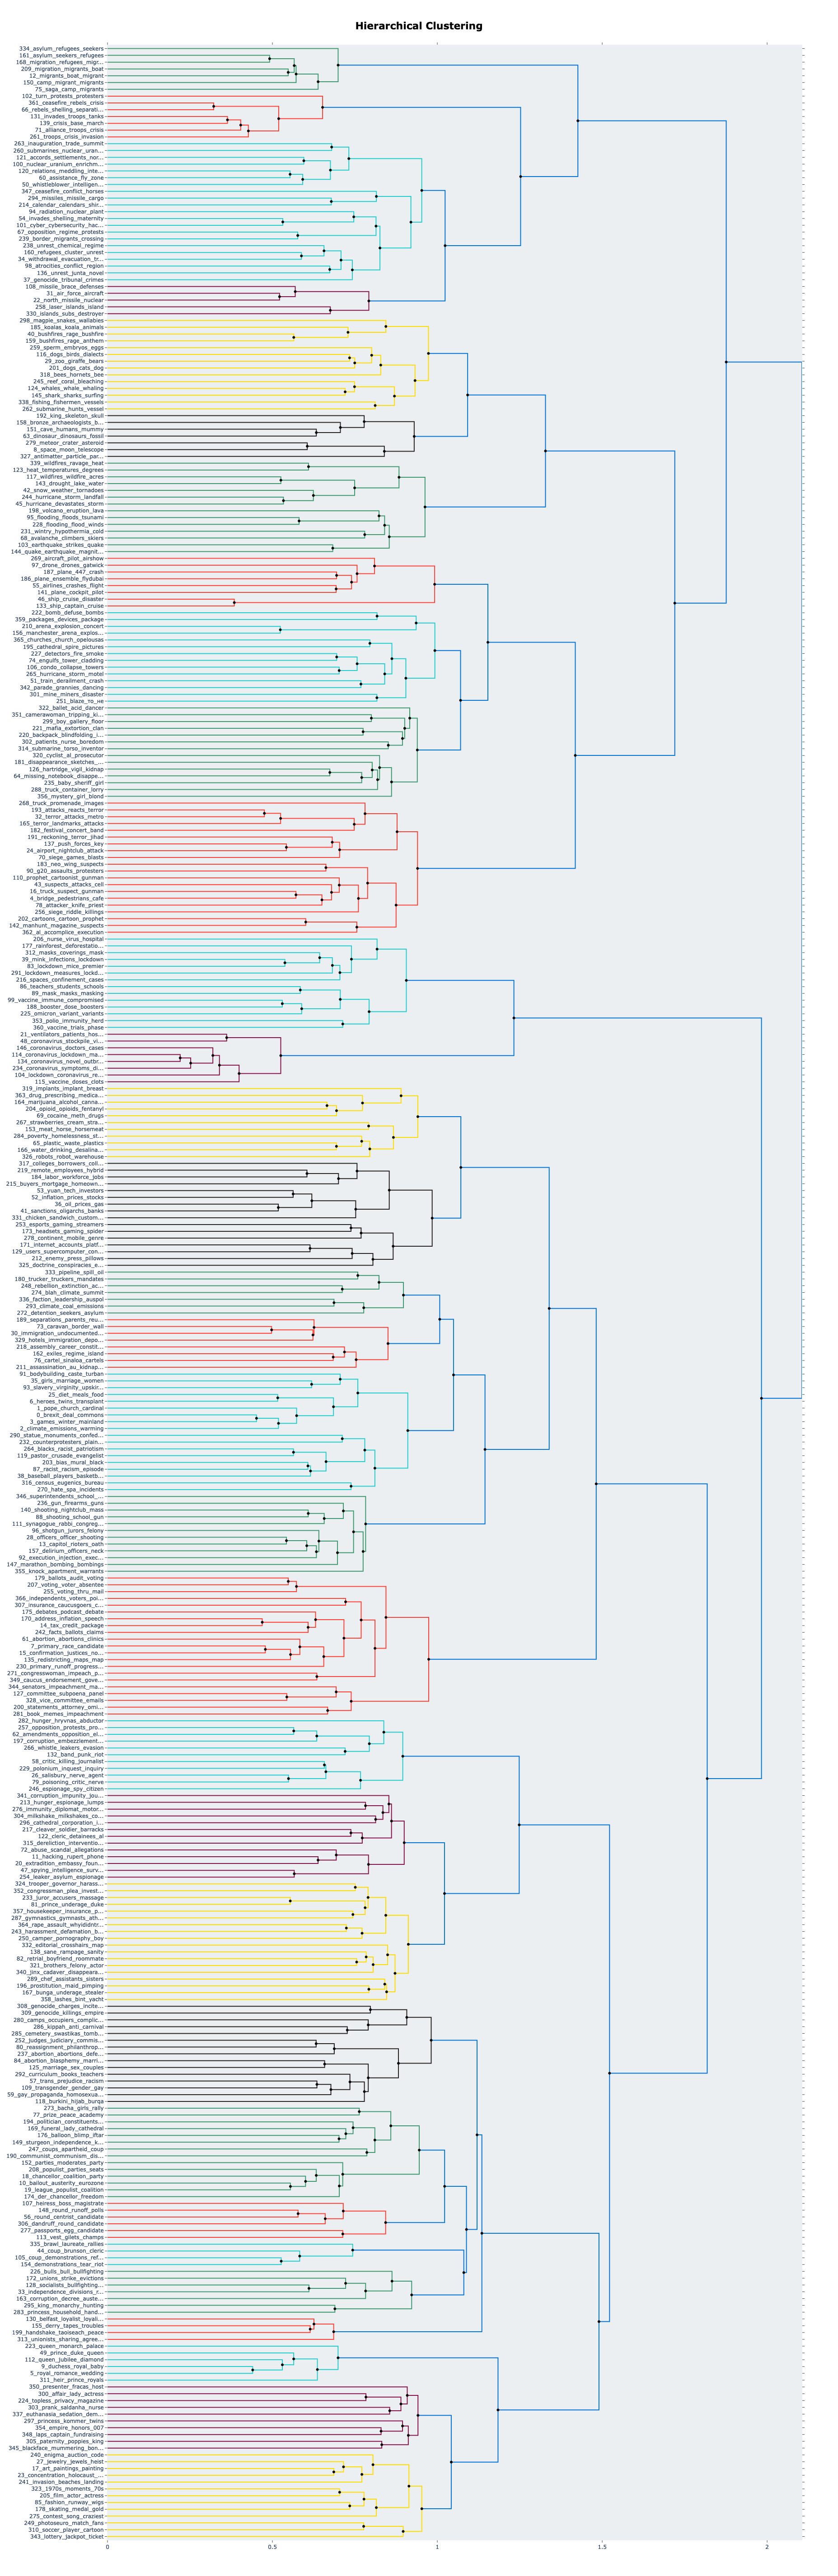

In [8]:
topic_model_l6.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

In [ ]:
import spacy
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from bertopic.representation import PartOfSpeech
from bertopic.vectorizers import ClassTfidfTransformer

model = SentenceTransformer('all-mpnet-base-v2')
pos_patterns = [
            [{"DEP": "nsubj"}],
            [{"POS": "NOUN"}]
]
representation_model = representation_model = PartOfSpeech("en_core_web_sm", pos_patterns=pos_patterns)
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)
topic_model_rep = BERTopic(verbose=True, embedding_model=model, representation_model=representation_model, ctfidf_model=ctfidf_model)
topics_rep, probs_rep = topic_model_rep.fit_transform(only_news_df.short_description)

topic_model_rep.get_topic_info()

In [ ]:
import spacy
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from bertopic.representation import PartOfSpeech
from bertopic.vectorizers import ClassTfidfTransformer

model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')
pos_patterns = [
            [{"DEP": "nsubj"}],
            [{"POS": "NOUN"}]
]
representation_model = representation_model = PartOfSpeech("en_core_web_sm", pos_patterns=pos_patterns)
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)
topic_model_at = BERTopic(verbose=True, embedding_model=model, representation_model=representation_model, ctfidf_model=ctfidf_model)
topics_at, probs_at = topic_model_at.fit_transform(only_news_df['Article text'])

topic_model_at.get_topic_info()

In [ ]:
import spacy
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from bertopic.representation import PartOfSpeech
from bertopic.vectorizers import ClassTfidfTransformer
nlp = spacy.load("en_core_web_sm", exclude=['tagger', 'parser', 'ner', 
                                            'attribute_ruler', 'lemmatizer'])
ctfidf_model = ClassTfidfTransformer(reduce_frequent_words=True)
topic_model_nlp = BERTopic(verbose=True, embedding_model=nlp, ctfidf_model=ctfidf_model)
topics_nlp, probs_nlp = topic_model_nlp.fit_transform(only_news_df['Article text'])

topic_model_nlp.get_topic_info()

In [169]:
decent_topic_model_rep = topic_model_rep.get_topic_info()

In [256]:
decent_topic_model_rep

Topic  Count                                         Name  \
0       -1   6516                -1_crisis_war_military_troops   
1        0    321           0_climate_emissions_warming_carbon   
2        1    320    1_immigration_immigrants_immigrant_border   
3        2    300               2_brexit_deal_backstop_commons   
4        3    256           3_primary_race_candidates_governor   
..     ...    ...                                          ...   
424    423     10       423_inmates_prisons_inmate_confinement   
425    424     10        424_flooding_floods_floodwaters_rains   
426    425     10  425_water_desalination_rainwater_freshwater   
427    426     10         426_particle_boson_physics_physicist   
428    427     10          427_headsets_headset_avatars_avatar   

                                        Representation  \
0    [crisis, war, military, troops, pope, me, help...   
1    [climate, emissions, warming, carbon, coal, en...   
2    [immigration, immigrants, immigrant, border, d...   
3    [brexit, deal, backstop, commons, negotiations...   
4    [primary, race, candidates, governor, races, c...   
..                                                 ...   
424  [inmates, prisons, inmate, confinement, prison...   
425  [flooding, floods, floodwaters, rains, landmin...   
426  [water, desalination, rainwater, freshwater, g...   
427  [particle, boson, physics, physicist, particle...   
428  [headsets, headset, avatars, avatar, worlds, m...   

                                   Representative_Docs  
0    [Story highlights "I think there's not a need"...  
1    [CNN columnist John D. Sutter is reporting fro...  
2    [Jesús sits beside his parents, staring at the...  
3    [Luke McGee is a senior producer at CNN based ...  
4    [ Six years ago, Sen. Marco Rubio offered a bl...  
..                                                 ...  
424  [ A Mississippi penitentiary unit housing viol...  
425  [Story highlightsAt least 320 seek medical hel...  
426  [New Delhi Hundreds of empty plastic jugs wait...  
427  [ The ashes of world famous physicist Steven H...  
428  [ The tech world's latest virtual assistant lo...  

[429 rows x 5 columns]

In [170]:
decent_doc_rep = topic_model_rep.get_document_info(only_news_df['Article text'])

In [188]:
t = topic_model_rep.get_document_info(only_news_df['Article text'])

In [191]:
t.to_csv('test_model_findings_1.csv', index=False)

In [196]:
t.loc[21940].Document


' Here\'s a look at the life of Her Royal Highness, the Duchess of Cornwall.PersonalBirth date: July 17, 1947 Birth place: London, England Birth name: Camilla Rosemary Shand  Read MoreFather: Major Bruce Shand, retired British Army officer, later a wine merchant Mother: Rosalind Cubitt, daughter of the 3rd Baron of Ashcombe Marriages: Prince Charles (April 9, 2005-present), Andrew Parker-Bowles (1973-1995, divorced)         Children: with Andrew Parker-Bowles: Laura Rose and Thomas Henry   Other FactsHer complete title is: Her Royal Highness The Princess Charles, Princess of Wales and Countess of Chester, Duchess of Cornwall, Duchess of Rothesay, Countess of Carrick, Baroness of Renfrew, Lady of the Isles, Princess of ScotlandAlice Keppel, mistress of King Edward VII, the great-great-grandfather of Prince Charles, is the great-grandmother of Duchess Camilla.An avid hunter and rider.Like her husband, the Duchess is a patron of the arts and many charities.Timeline1965 - Introduced to Bri

In [89]:
only_news_df.loc[27]['Keywords']

'tech, These futuristic pods could help free up roads - CNN'

In [91]:
only_news_df.loc[0]

Author                                            Jacopo Prisco, CNN
Date published                                   2021-07-15 02:46:59
Category                                                        news
Section                                                        world
Url                https://www.cnn.com/2021/07/14/world/tusimple-...
Headline           There's a shortage of truckers, but TuSimple t...
Description        The e-commerce boom has exacerbated a global t...
Keywords           world, There's a shortage of truckers, but TuS...
Second headline    There's a shortage of truckers, but TuSimple t...
Article text        Right now, there's a shortage of truck driver...
published_year                                                  2021
super_category                                                  News
Name: 0, dtype: object

In [ ]:
import re
import nltk

# first lowercase and remove punctuation
alpha = re.compile(r'[^a-zA-Z ]+')
data = only_news_df['Article text'][0]
data = re.sub(alpha, "", data)
stopwords = set(nltk.corpus.stopwords.words('english'))
tokenized_data = nltk.tokenize.wordpunct_tokenize(data)
tokenized_data = [t for t in tokenized_data if t.lower() not in stopwords]
tokenized_data

In [156]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("BAAI/bge-m3")
data = only_news_df['Article text'][0]
data1 = "There's a shortage of truckers, but TuSimple thinks it has a solution: no driver needed"
data2 = "autonomous driving"
data3 = "technology"
sentences = [data, data1, data2, data3, tokenized_data[0]]
embeddings = model.encode(sentences)
similarities = model.similarity(embeddings, embeddings)
similarities

tensor([[1.0000, 0.6690, 0.5562, 0.4874, 0.3251],
        [0.6690, 1.0000, 0.5030, 0.4065, 0.3470],
        [0.5562, 0.5030, 1.0000, 0.6276, 0.4813],
        [0.4874, 0.4065, 0.6276, 1.0000, 0.5375],
        [0.3251, 0.3470, 0.4813, 0.5375, 1.0000]])

In [154]:
c = results[0]
d = tokenized_data[0]
embeddings = model.encode([c,d])
similarities = model.similarity(embeddings, embeddings)
similarities

tensor([[1.0000, 0.5247],
        [0.5247, 1.0000]])

In [ ]:
import spacy
from spacy.matcher import Matcher

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

# Initialize the Matcher
matcher = Matcher(nlp.vocab)

# Define patterns for subjects (nsubj) and objects (dobj, pobj)
subject_pattern = [{"DEP": "nsubj"}]  # Nominal subject
object_pattern = [{"DEP": {"IN": ["dobj", "pobj"]}}]  # Direct or prepositional object
nouns = [{"POS": "NOUN"}]
# Add the patterns to the matcher
matcher.add("SUBJECT_PATTERN", [subject_pattern])
matcher.add("OBJECT_PATTERN", [nouns])

# Example: List of large document texts
documents = list(only_news_df['Article text'][0:2])

# Use nlp.pipe to process the documents in batches
results = []
for doc in nlp.pipe(documents, batch_size=50):  # Adjust batch_size as needed
    for sent in doc.sents:  # Iterate over sentences in each document
        subjects = []
        objects = []
        for match_id, start, end in matcher(sent):
            span = doc[start:end]
            # Check which pattern was matched
            if nlp.vocab.strings[match_id] == "SUBJECT_PATTERN":
                subjects.append(span.text)
            elif nlp.vocab.strings[match_id] == "OBJECT_PATTERN":
                objects.append(span.text)
        # Append results for each sentence
        results.append({"sentence": sent.text.strip(), "subjects": subjects, "objects": objects})

# Print the extracted subjects and objects
for result in results:
    print(f"Sentence: {result['sentence']}")
    print(f"Subjects: {', '.join(result['subjects']) if result['subjects'] else 'None'}")
    print(f"Objects: {', '.join(result['objects']) if result['objects'] else 'None'}")
    print("-" * 40)


In [142]:
len(embeddings)

2

In [27]:
topic_model2.get_document_info(only_news_df['Keywords'])

Document  Topic  \
0      world, There's a shortage of truckers, but TuS...    116   
1      world, Bioservo's robotic 'Ironhand' could pro...    245   
2      asia, This swarm of robots gets smarter the mo...    245   
3      success, Two years later, remote work has chan...    103   
4      investing, Why March is so volatile for stocks...     51   
...                                                  ...    ...   
21936  europe, Analysis: The shifting map of Ukraine ...     27   
21937  europe, Vladimir Putin faces stiffer oppositio...     -1   
21938  europe, On NATO's doorstep, a former tourist h...     30   
21939         europe, Mikhail Gorbachev Fast Facts - CNN    126   
21940           europe, Duchess Camilla Fast Facts - CNN     -1   

                                  Name  \
0       116_cars_electric_self_driving   
1      245_robots_robot_reproduce_beer   
2      245_robots_robot_reproduce_beer   
3        103_success_economy_jobs_your   
4        51_investing_stocks_fed_rates   
...                                ...   
21936   27_ukraine_crisis_war_conflict   
21937            -1_us_cnn_the_opinion   
21938  30_troops_ukraine_invasion_kyiv   
21939      126_facts_fast_david_romano   
21940            -1_us_cnn_the_opinion   

                                          Representation  \
0      [cars, electric, self, driving, tech, trucks, ...   
1      [robots, robot, reproduce, beer, stores, super...   
2      [robots, robot, reproduce, beer, stores, super...   
3      [success, economy, jobs, your, office, shortag...   
4      [investing, stocks, fed, rates, inflation, cry...   
...                                                  ...   
21936  [ukraine, crisis, war, conflict, eastern, ukra...   
21937  [us, cnn, the, opinion, to, in, of, and, cnnpo...   
21938  [troops, ukraine, invasion, kyiv, russian, con...   
21939  [facts, fast, david, romano, haines, prodi, re...   
21940  [us, cnn, the, opinion, to, in, of, and, cnnpo...   

                                     Representative_Docs  \
0      [tech, Singapore wants self-driving cars to he...   
1      [business, Robots are stacking shelves in Toky...   
2      [business, Robots are stacking shelves in Toky...   
3      [success, Some employees in the office. Some a...   
4      [investing, Stocks sink as inflation worries r...   
...                                                  ...   
21936  [Ukraine crisis, Ukraine anti-terrorist operat...   
21937  [europe, Terror threat in Europe 'as high as i...   
21938  [europe, Ukraine-Russia news: troops 'insuffic...   
21939  [europe, David Cameron Fast Facts - CNN, europ...   
21940  [europe, Terror threat in Europe 'as high as i...   

                                             Top_n_words  Probability  \
0      cars - electric - self - driving - tech - truc...     1.000000   
1      robots - robot - reproduce - beer - stores - s...     1.000000   
2      robots - robot - reproduce - beer - stores - s...     0.947095   
3      success - economy - jobs - your - office - sho...     0.592524   
4      investing - stocks - fed - rates - inflation -...     0.848422   
...                                                  ...          ...   
21936  ukraine - crisis - war - conflict - eastern - ...     0.755284   
21937  us - cnn - the - opinion - to - in - of - and ...     0.000000   
21938  troops - ukraine - invasion - kyiv - russian -...     0.711262   
21939  facts - fast - david - romano - haines - prodi...     0.915744   
21940  us - cnn - the - opinion - to - in - of - and ...     0.000000   

       Representative_document  
0                        False  
1                        False  
2                        False  
3                        False  
4                        False  
...                        ...  
21936                    False  
21937                    False  
21938                    False  
21939                    False  
21940                    False  

[21941 rows x 8 column

In [25]:
only_news_df.loc[21937].Keywords

'europe, Madeira wildfires: 3 dead in blazes on Portugal island - CNN'